In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns', None)

In [5]:
preprocessed_path = './csv/preprocessed'
df = pd.read_csv(f'{preprocessed_path}/data_preprocessed.csv')

In [6]:
df.head()

,성별코드,연령대 코드,허리둘레,식전혈당,총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,AST,ALT,감마지티피,흡연상태,음주여부,복부비만,비만여부,고혈압
0,1,8,90.0,0.0,193.0,92.0,48.0,126.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1.0,1.0,1.0,1.0
1,1,7,89.0,1.0,228.0,121.0,55.0,148.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0.0,0.0,0.0,1.0
2,1,9,91.0,0.0,136.0,104.0,41.0,74.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0.0,1.0,1.0,1.0
3,1,11,91.0,0.0,201.0,106.0,76.0,104.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0.0,1.0,1.0,2.0
4,1,11,80.0,1.0,199.0,104.0,61.0,117.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0.0,0.0,0.0,1.0


In [7]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from pandas import set_option
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [57]:
def GetTrainTest(df):
    X =  df.loc[:, df.columns != '식전혈당']
    Y = df['식전혈당']
    X_train, X_test, y_train, y_test =train_test_split(X, Y, test_size=0.2, shuffle=True)
    
    return X_train, X_test, y_train, y_test

def GetBasedModel():
    basedModels = []
    
    #Linear Model
    basedModels.append(LogisticRegression(class_weight='balanced'))
    basedModels.append(Perceptron(class_weight='balanced'))
    
    #Nearest Neighborhood
    #basedModels.append(KNeighborsClassifier()) Not Suitable for imbalanced data
    
    #Tree
    basedModels.append(DecisionTreeClassifier(class_weight='balanced'))
    
    #Naives Bayes
    basedModels.append(ComplementNB()) #Suitable NB for Imbalanced Data
    
    #SVM
    #basedModels.append(SVC(probability=True)) 시간이 너무 오래 걸림
    
    #Ensemble Methods
    basedModels.append(AdaBoostClassifier())
    basedModels.append(GradientBoostingClassifier())
    basedModels.append(RandomForestClassifier())
    
    return basedModels

def EvaluateModel(X, Y, models, scoring='accuracy'):
    names = []
    results = []
    
    for model in models:
        tic = time.perf_counter()
        name = model.__class__.__name__
        cv_result = cross_val_score(model, X, Y, scoring=scoring, cv = 3)
        results.append(cv_result)
        names.append(name)
        toc = time.perf_counter()
        msg = "%s: %f (%0.4f seconds)" % (name, cv_result.mean(), round((toc-tic), 4))
        print(msg)
        
    return names, results

def ScoreDataFrame(names,results):
    #https://www.kaggle.com/pouryaayria/a-complete-ml-pipeline-tutorial-acu-86
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [9]:
df_binary = df.copy()
df_binary.loc[df['식전혈당'] == 1, '식전혈당'] = 0
df_binary.loc[df['식전혈당'] == 2, '식전혈당'] = 1

X =  df.loc[:, df.columns != '식전혈당']
y = df['식전혈당']
X_binary = df_binary.loc[:, df.columns != '식전혈당']
y_binary = df_binary['식전혈당']
#X_train, X_test, Y_train, Y_test = GetTrainTest(df)
#X_train2, X_test2, Y_train2, Y_test2 = GetTrainTest(df_binary)

## Feature Selection

In [35]:
features = []

In [10]:
#Feature Selection using RFE
#rfe = RFE(model)
#fit = rfe.fit(X, y)
#X_rfe = X.columns.values[fit.get_support()]
#print("Num Featrues: %d" % fit.n_features_)
#print("Selected Features: %s" % fit.support_)
#print("Feature Ranking: %s" % fit.ranking_)
#print(X_rfe)
#features.append(('X_rfe', X_rfe))

In [19]:
#Feature Selection using Information Gain
def Entropy(df, attribute) :
    list1  = list(df[attribute].unique())
    etp = 0
    for i in range(len(list1)):
        q1 = len(df[df[attribute] == list1[i]])/len(df[attribute])
        etp -=  q1*np.log2(q1)
    return etp


def Group_info(df,m_attribute,fix_attribute):
    list2 = list(df[m_attribute].unique())
    info_Entropy = Entropy(df,fix_attribute)
    info_data = 0
    for i in range (len(list2)) :
        q2 = df.loc[df[m_attribute] == list2[i]]
        info_data +=  (len(q2[m_attribute])/len(df[m_attribute]))* Entropy(q2,fix_attribute) 
    
    data = info_Entropy - info_data
    
    return data

info = X.columns

info_gain = []

for i in info:
    info_gain.append(Group_info(df, i, "식전혈당"))
    
EntropyDataFrame = pd.DataFrame({'Columns':info, 'Entropy': info_gain})
EntropyDataFrame.sort_values(by = ['Entropy'], ascending=False, inplace = True)
EntropyDataFrame

threshold = 0.02
X_info = EntropyDataFrame.loc[EntropyDataFrame['Entropy']>threshold].Columns
print("Num Features: %d" % X_info.shape[0])
print("Selected Features: %s" % X_info.values)
features.append(('X_info', X_info.values))

Num Features: 8
Selected Features: ['허리둘레' '감마지티피' '연령대 코드' '트리글리세라이드' 'ALT' '고혈압' '복부비만' '비만여부']


In [22]:
#Feature Selection using Logistic Regression, Gradient Boost Classifier, RandomForestClassifier
models = []
models.append(('LR', LogisticRegression()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))

for name, model in models:
    fit = SelectFromModel(estimator=model).fit(X, y)
    X_name = 'X_'+name
    X_fs = X.columns.values[fit.get_support()]
    print(X_name)
    print("Num Features: %d" % X_fs.shape[0])
    print("Selected Features: %s" % X_fs)
    features.append((X_name, X_fs))

X_LR
Num Features: 7
Selected Features: ['성별코드' '연령대 코드' '요단백' '음주여부' '복부비만' '비만여부' '고혈압']
X_GBM
Num Features: 5
Selected Features: ['연령대 코드' '허리둘레' '트리글리세라이드' '감마지티피' '고혈압']
X_RF
Num Features: 10
Selected Features: ['연령대 코드' '허리둘레' '총콜레스테롤' '트리글리세라이드' 'HDL콜레스테롤' 'LDL콜레스테롤' '혈색소' 'AST'
 'ALT' '감마지티피']


In [36]:
features.append(('X_info', np.array(['허리둘레', '감마지티피', '연령대 코드', '트리글리세라이드', 'ALT', '고혈압', '복부비만', '비만여부'])))
features.append(('X_LR', np.array(['성별코드', '연령대 코드', '요단백', '음주여부', '복부비만', '비만여부', '고혈압'])))
features.append(('X_GBM', np.array(['연령대 코드', '허리둘레', '트리글리세라이드', '감마지티피', '고혈압'])))
features.append(('X_RF', np.array(['연령대 코드', '허리둘레', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', 'AST',
 'ALT', '감마지티피'])))
features

[('X_info', array(['허리둘레', '감마지티피', '연령대 코드', '트리글리세라이드', 'ALT', '고혈압', '복부비만',
         '비만여부'], dtype='<U8')),
 ('X_LR', array(['성별코드', '연령대 코드', '요단백', '음주여부', '복부비만', '비만여부', '고혈압'],
        dtype='<U6')),
 ('X_GBM', array(['연령대 코드', '허리둘레', '트리글리세라이드', '감마지티피', '고혈압'], dtype='<U8')),
 ('X_RF',
  array(['연령대 코드', '허리둘레', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
         '혈색소', 'AST', 'ALT', '감마지티피'], dtype='<U8'))]

## Train Model

In [58]:
models = GetBasedModel()
score_name = ['Model', 'Score_default']
result_list = []

In [59]:
names, results = EvaluateModel(X, y, models)
result_list.append(('Default', results))
ModelComparison = ScoreDataFrame(names,results)

for name, X_feat in features:
    print(name)
    score_name.append('Score'+name[1:])
    names, results = EvaluateModel(X[X_feat], y, models)
    result_list.append((name, results))
    basedLineScore = ScoreDataFrame(names,results)
    ModelComparison = ModelComparison.merge(basedLineScore, on='Model', how='left')
    print()

LogisticRegression: 0.591329 (534.7613 seconds)
Perceptron: 0.538768 (11.3623 seconds)
DecisionTreeClassifier: 0.530795 (63.7553 seconds)
ComplementNB: 0.583626 (1.8226 seconds)
AdaBoostClassifier: 0.631127 (261.4433 seconds)
GradientBoostingClassifier: 0.635167 (2183.8628 seconds)
RandomForestClassifier: 0.608343 (135.7594 seconds)
X_info
LogisticRegression: 0.586542 (113.0462 seconds)
Perceptron: 0.549429 (10.2117 seconds)
DecisionTreeClassifier: 0.523131 (30.2049 seconds)
ComplementNB: 0.591874 (1.4021 seconds)
AdaBoostClassifier: 0.630232 (165.9954 seconds)
GradientBoostingClassifier: 0.631713 (1132.3707 seconds)
RandomForestClassifier: 0.595252 (74.0197 seconds)

X_LR
LogisticRegression: 0.585650 (26.0268 seconds)
Perceptron: 0.561275 (8.9887 seconds)
DecisionTreeClassifier: 0.457559 (9.2227 seconds)
ComplementNB: 0.575001 (1.4389 seconds)
AdaBoostClassifier: 0.625068 (91.8107 seconds)
GradientBoostingClassifier: 0.625615 (634.0162 seconds)
RandomForestClassifier: 0.623872 (27.567

In [63]:
ModelComparison.columns = score_name
ModelComparison

,Model,Score_default,Score_info,Score_LR,Score_GBM,Score_RF
0,LogisticRegression,0.5913,0.5865,0.5856,0.5870,0.5859
1,Perceptron,0.5388,0.5494,0.5613,0.5389,0.6016
2,DecisionTreeClassifier,0.5308,0.5231,0.4576,0.5180,0.5276
3,ComplementNB,0.5836,0.5919,0.5750,0.5919,0.5826
4,AdaBoostClassifier,0.6311,0.6302,0.6251,0.6303,0.6289
5,GradientBoostingClassifier,0.6352,0.6317,0.6256,0.6313,0.6326
6,RandomForestClassifier,0.6083,0.5953,0.6239,0.5757,0.6049


In [61]:
result_list

[('Default',
  [array([0.59934044, 0.59979196, 0.57485336]),
   array([0.6201279 , 0.60224784, 0.39392908]),
   array([0.53547839, 0.53715654, 0.51974858]),
   array([0.58703075, 0.58685487, 0.57699206]),
   array([0.63283874, 0.6329545 , 0.62758854]),
   array([0.63687822, 0.63620101, 0.63242102]),
   array([0.61231015, 0.61171452, 0.60100521])]),
 ('X_info',
  [array([0.59536626, 0.59467496, 0.56958474]),
   array([0.58785404, 0.61810261, 0.44233088]),
   array([0.52745074, 0.52978657, 0.51215701]),
   array([0.5938946 , 0.59442075, 0.5873054 ]),
   array([0.63168194, 0.63214986, 0.6268632 ]),
   array([0.63289471, 0.63354456, 0.62870104]),
   array([0.59924715, 0.59979663, 0.586713  ])]),
 ('X_LR',
  [array([0.59430041, 0.59479158, 0.56785652]),
   array([0.62145496, 0.61645836, 0.44591093]),
   array([0.47312066, 0.47179237, 0.42776346]),
   array([0.57810518, 0.5780039 , 0.56889438]),
   array([0.62653463, 0.62589705, 0.62277238]),
   array([0.62719932, 0.62675532, 0.622889  ]),
 

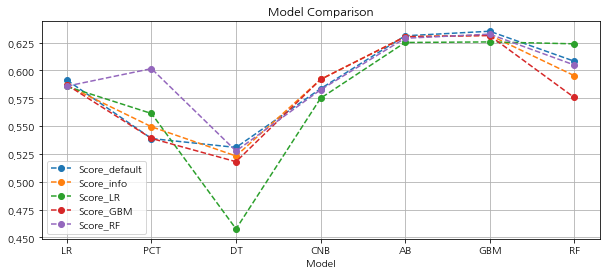

In [127]:
ModelComparison.plot(x="Model",linestyle='--', marker='o', grid=True, figsize=(10, 4))
model_labels = ['LR', 'PCT', 'DT', 'CNB', 'AB', 'GBM', 'RF']
plt.title('Model Comparison')
locs, labels = plt.xticks()
plt.xticks((locs+1)[:7], model_labels)
plt.show()

In [134]:
X_train, X_test, y_train, y_test = GetTrainTest(df)

In [155]:
model = LogisticRegression()
X_LR = features[1][1]
model.fit(X_train[X_LR], y_train)
y_pred = model.predict(X_test[X_LR])

In [156]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[146528  12221    228]
 [ 64846  13081    293]
 [ 14216   5518    329]]
0.6216978931819949


## How About Binary Classification?

In [157]:
models = GetBasedModel()
score_name = ['Model', 'Score_default']
binary_list = []

names, results = EvaluateModel(X_binary, y_binary, models)
binary_list.append(('Default', results))
BinaryModelComparison = ScoreDataFrame(names,results)

for name, X_feat in features:
    print(name)
    score_name.append('Score'+name[1:])
    names, results = EvaluateModel(X_binary[X_feat], y_binary, models)
    binary_list.append((name, results))
    basedLineScore = ScoreDataFrame(names,results)
    BinaryModelComparison = BinaryModelComparison.merge(basedLineScore, on='Model', how='left')
    print()

LogisticRegression: 0.694644 (167.1863 seconds)
Perceptron: 0.885505 (4.9278 seconds)
DecisionTreeClassifier: 0.871052 (63.7920 seconds)
ComplementNB: 0.733173 (1.9025 seconds)
AdaBoostClassifier: 0.921450 (267.1597 seconds)
GradientBoostingClassifier: 0.922304 (595.9360 seconds)
RandomForestClassifier: 0.919928 (120.0347 seconds)
X_info
LogisticRegression: 0.670820 (33.3712 seconds)
Perceptron: 0.900129 (4.1127 seconds)
DecisionTreeClassifier: 0.866645 (28.1892 seconds)
ComplementNB: 0.761192 (1.5857 seconds)
AdaBoostClassifier: 0.922010 (148.7823 seconds)
GradientBoostingClassifier: 0.922139 (312.7972 seconds)
RandomForestClassifier: 0.918374 (64.7609 seconds)

X_LR
LogisticRegression: 0.666013 (8.6894 seconds)
Perceptron: 0.875823 (4.1781 seconds)
DecisionTreeClassifier: 0.603810 (9.0643 seconds)
ComplementNB: 0.667626 (1.7088 seconds)
AdaBoostClassifier: 0.921849 (82.9952 seconds)
GradientBoostingClassifier: 0.922108 (180.0141 seconds)
RandomForestClassifier: 0.921523 (27.3085 seco

In [158]:
BinaryModelComparison.columns = score_name
BinaryModelComparison

,Model,Score_default,Score_info,Score_LR,Score_GBM,Score_RF
0,LogisticRegression,0.6946,0.6708,0.6660,0.6722,0.6877
1,Perceptron,0.8855,0.9001,0.8758,0.8813,0.8633
2,DecisionTreeClassifier,0.8711,0.8666,0.6038,0.8637,0.8701
3,ComplementNB,0.7332,0.7612,0.6676,0.7600,0.7332
4,AdaBoostClassifier,0.9214,0.9220,0.9218,0.9220,0.9215
5,GradientBoostingClassifier,0.9223,0.9221,0.9221,0.9221,0.9221
6,RandomForestClassifier,0.9199,0.9184,0.9215,0.9108,0.9194


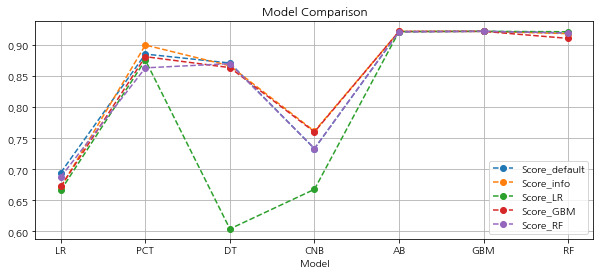

In [159]:
BinaryModelComparison.plot(x="Model",linestyle='--', marker='o', grid=True, figsize=(10, 4))
model_labels = ['LR', 'PCT', 'DT', 'CNB', 'AB', 'GBM', 'RF']
plt.title('Model Comparison')
locs, labels = plt.xticks()
plt.xticks((locs+1)[:7], model_labels)
plt.show()

In [145]:
X_train2, X_test2, y_train2, y_test2 = GetTrainTest(df_binary)
model = RandomForestClassifier()
X_LR = features[1][1]
model.fit(X_train2[X_LR], y_train2)
y_pred = model.predict(X_test2[X_LR])

#False Negative 비율이 높음...

[[236806    394]
 [ 19808    252]]


In [148]:
model2 = RandomForestClassifier()
model2.fit(X_train2, y_train2)
y_pred = model2.predict(X_test2)
print(confusion_matrix(y_test2, y_pred))
print(accuracy_score(y_test2, y_pred))

[[235982   1218]
 [ 19376    684]]
0.9199486900412035


In [152]:
model3 = RandomForestClassifier()
X_GBM = features[2][1]
model3.fit(X_train2[X_GBM], y_train2)
y_pred = model3.predict(X_test2[X_GBM])
print(confusion_matrix(y_test2, y_pred))

[[233474   3726]
 [ 19351    709]]
